# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na área de Marketing em entender as necessidades e demandas dos clientes de maneira fácil e rápida nas redes sociais. A solução proposta para esse problema foi o desenvolvimento de uma Inteligência Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solução é rastrear os dados em tempo real, analisar e interpretar as mensagens e comentários enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto está utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informações dispostas nesse dataset, realizaremos insights a cerca dos comentários feitos nos posts do Instagram do próprio banco. Vale lembrar que os dados estão anonimizados e resguardados para manter a privacidade e ética com os usuários e com o banco.

# 1. Instalação / Setup

Para o início do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma célula de conexão com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisará do dataset baixado.

In [3]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Aqui nós fazemos as importações para tratamento dos dados e modelagem do Bag of Words, para logo depois aplicar o algoritmo de Naive Bayes.

In [4]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

from sklearn.feature_extraction.text import CountVectorizer
import ast
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

import nltk
import spacy
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *


# 2. Entendimento e Tratamento dos Dados

Rodando o dataset, para analisar seu conteúdo:

In [10]:
df = pd.read_csv('/content/drive/MyDrive/nova_base_tratada').drop(['Unnamed: 0'], axis=1)
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,marta_bego,1,"['btgpactual', 'with', 'makerepost', 'entender..."
2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,vanilson_dos,1,['sim']
4,ricktolledo,2,"['querer', 'saber', 'banking', 'próprio', 'adm..."
...,...,...,...
9202,perspectiveinvestimentos,2,"['excelente', 'explicação']"
9203,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
9204,danielucm,2,"['saber', 'qual', 'grande', 'fiis', 'mercado',..."
9205,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'antes', 'a..."


In [11]:
df.columns

Index(['autor', 'sentimento', 'texto_tratado'], dtype='object')

In [12]:
df['texto_tratado'] = df['texto_tratado'].str.replace("'", "")
df['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, makerepost, entender, impac...
2                                   [minuto, touro, ouro]
3                                                   [sim]
4           [querer, saber, banking, próprio, administro]
                              ...                        
9202                              [excelente, explicação]
9203                      [atendar, telefone, amor, deus]
9204    [saber, qual, grande, fiis, mercado, selecione...
9205    [erro, financeiro, eliminar, antes, ano, _, pa...
9206    [porque, morning, call, aparecer, spotify, atu...
Name: texto_tratado, Length: 9207, dtype: object

In [13]:
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,1,"[btgpactual, with, makerepost, entender, impac..."
2,lmviapiana,2,"[minuto, touro, ouro]"
3,vanilson_dos,1,[sim]
4,ricktolledo,2,"[querer, saber, banking, próprio, administro]"
...,...,...,...
9202,perspectiveinvestimentos,2,"[excelente, explicação]"
9203,eduardocolares,2,"[atendar, telefone, amor, deus]"
9204,danielucm,2,"[saber, qual, grande, fiis, mercado, selecione..."
9205,amgcapitalinvest,1,"[erro, financeiro, eliminar, antes, ano, _, pa..."


## 2.1 Visualização dos dados

### Autores que mais comentam

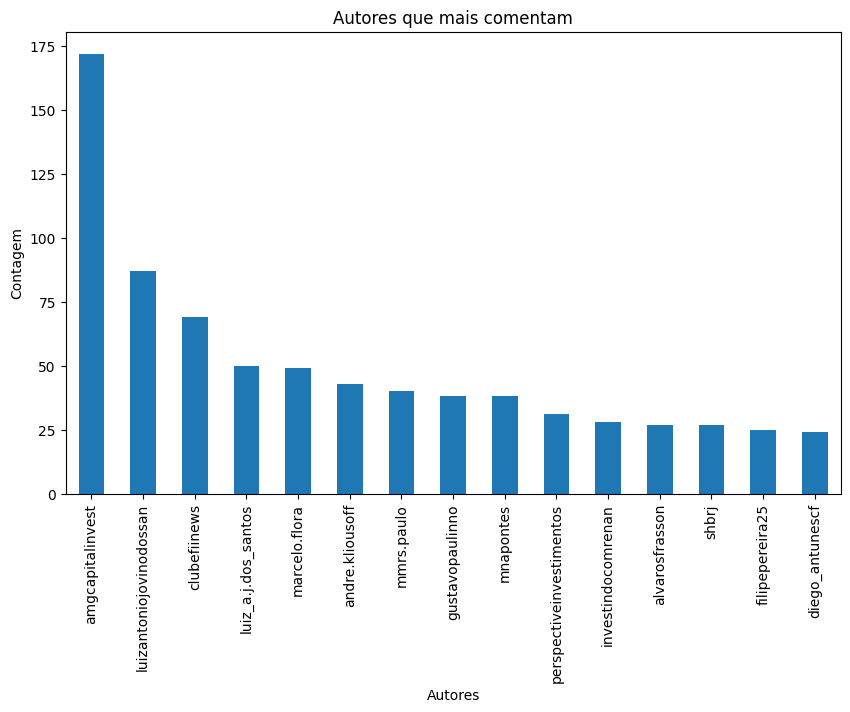

In [14]:
# Contagem de palavras
autor_counts = df['autor'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
autor_counts.head(15).plot(kind='bar')
plt.xlabel('Autores')
plt.ylabel('Contagem')
plt.title('Autores que mais comentam')
plt.show()

# 3. Bag of Words (BoW)

O modelo Bag of Words (BoW) é uma técnica utilizada em processamento de linguagem natural para representar um texto como um conjunto de palavras desordenadas, ignorando a ordem e a estrutura gramatical das frases. 

Nesse modelo, cada palavra única do texto é transformada em uma "feature" (característica), e a frequência de cada palavra no texto é usada como um valor numérico para a feature correspondente.

Por exemplo, a frase "O gato preto pulou o muro" seria representada como um conjunto de palavras desordenadas: `'o', 'gato', 'preto', 'pulou', 'o', 'muro'`. A frequência de cada palavra seria contada, e o resultado seria um vetor numérico que representa a frequência de cada palavra na frase.


## 3.1 Teste isolado

In [15]:
# Multiple documents
text = ["Estamos fazendo um projeto pro BTG!", "Somos alunos de Sistemas de Informação do Inteli", "O Renato é o nosso orientador", "O Hayashi é o nosso professor de programação"] 

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(sorted(vectorizer.vocabulary_))

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

['alunos', 'btg', 'de', 'do', 'estamos', 'fazendo', 'hayashi', 'informação', 'inteli', 'nosso', 'orientador', 'pro', 'professor', 'programação', 'projeto', 'renato', 'sistemas', 'somos', 'um']
(4, 19)
[[0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1]
 [1 0 2 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0]]


**AVISO**:
O modelo Bag of Words é uma técnica simples e eficiente para representar textos em formato vetorial, o que permite utilizá-los em algoritmos de aprendizado de máquina. 

No entanto, essa abordagem ignora informações importantes sobre a estrutura e o significado das frases, como a ordem das palavras e as relações sintáticas entre elas. Por isso, é comum utilizar técnicas mais avançadas, como a modelagem de tópicos (topic modeling) e as redes neurais, para lidar com textos mais complexos.

Porém, para vieses acadêmicos, estamos implementando e aprendendo como é o funcionamento desse processo.

## 3.2 Definição da Função


In [16]:
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,1,"[btgpactual, with, makerepost, entender, impac..."
2,lmviapiana,2,"[minuto, touro, ouro]"
3,vanilson_dos,1,[sim]
4,ricktolledo,2,"[querer, saber, banking, próprio, administro]"
...,...,...,...
9202,perspectiveinvestimentos,2,"[excelente, explicação]"
9203,eduardocolares,2,"[atendar, telefone, amor, deus]"
9204,danielucm,2,"[saber, qual, grande, fiis, mercado, selecione..."
9205,amgcapitalinvest,1,"[erro, financeiro, eliminar, antes, ano, _, pa..."


In [17]:
def bow(frases):
    # Inicializa o CountVectorizer
    vectorizer = CountVectorizer()

    # Concatena os tokens de cada frase em uma única string
    frases_concatenadas = [''.join(tokens) for tokens in frases]

    # Cria o modelo Bag of Words
    bow_model = vectorizer.fit_transform(frases_concatenadas)

    # Dicionário de palavras
    dicionario = vectorizer.vocabulary_

    return bow_model, dicionario

# Aplicar a função de Bag of Words
bow_model, dicionario = bow(df['texto_tratado'].tolist())

## 3.3 Testes das funções


In [18]:
bow_model, dicionario

(<9207x19392 sparse matrix of type '<class 'numpy.int64'>'
 	with 176805 stored elements in Compressed Sparse Row format>,
 {'alvarez': 766,
  'marsal': 11388,
  'estar': 6683,
  'conosco': 4114,
  'sportainmet': 16955,
  'registered': 15328,
  'labsr': 10376,
  'primeiro': 14331,
  'evento': 6853,
  'sportainment': 16954,
  'américar': 895,
  'latino': 10462,
  'parceria': 13273,
  'hubstage': 8944,
  'bichar': 2182,
  'motta': 12088,
  'advogado': 381,
  'win': 18965,
  'the': 17577,
  'game': 8052,
  'participe': 13312,
  'online': 12915,
  'gratuito': 8453,
  'março': 11408,
  'inscreva_se': 9506,
  'linkr': 10733,
  'bio': 2206,
  'blueheart': 2297,
  'winkingface': 18972,
  'btgpactual': 2606,
  'with': 18983,
  'makerepost': 11142,
  'entender': 6352,
  'impacto': 9164,
  'conflito': 4062,
  'rússia': 16013,
  'ucrânio': 18141,
  'cenário': 3227,
  'global': 8283,
  'live': 10764,
  'inédito': 9774,
  'amanhã': 798,
  'partir': 13323,
  'anatole': 923,
  'kaletsky': 10241,
  'só

- A cada vetor, é uma palavra diferente. Veja os exemplos abaixo:

In [19]:
peso_procurado = 19384
palavra_procurada = None

for palavra, peso in dicionario.items():
    if peso == peso_procurado:
        palavra_procurada = palavra
        break

print(palavra_procurada)

𝚜𝚞𝚊


In [20]:
peso_procurado = 19380
palavra_procurada = None

for palavra, peso in dicionario.items():
    if peso == peso_procurado:
        palavra_procurada = palavra
        break

print(palavra_procurada)

𝚜𝚊𝚋𝚎𝚛


In [21]:
# Imprime o vocabulário de palavras construído a partir do dataset
print("Dicionário de palavras:")
print(dicionario, "\n")

# Imprime a matriz Bag of Words
print("Representação Bag of Words:")
print(bow_model.toarray())

Dicionário de palavras:
{'alvarez': 766, 'marsal': 11388, 'estar': 6683, 'conosco': 4114, 'sportainmet': 16955, 'registered': 15328, 'labsr': 10376, 'primeiro': 14331, 'evento': 6853, 'sportainment': 16954, 'américar': 895, 'latino': 10462, 'parceria': 13273, 'hubstage': 8944, 'bichar': 2182, 'motta': 12088, 'advogado': 381, 'win': 18965, 'the': 17577, 'game': 8052, 'participe': 13312, 'online': 12915, 'gratuito': 8453, 'março': 11408, 'inscreva_se': 9506, 'linkr': 10733, 'bio': 2206, 'blueheart': 2297, 'winkingface': 18972, 'btgpactual': 2606, 'with': 18983, 'makerepost': 11142, 'entender': 6352, 'impacto': 9164, 'conflito': 4062, 'rússia': 16013, 'ucrânio': 18141, 'cenário': 3227, 'global': 8283, 'live': 10764, 'inédito': 9774, 'amanhã': 798, 'partir': 13323, 'anatole': 923, 'kaletsky': 10241, 'sócio_fundador': 17273, 'economista_chefe': 5923, 'gavekal': 8111, 'research': 15532, 'joão': 10132, 'scandiuzzi': 16234, 'estrategista': 6743, 'wealth': 18898, 'management': 11171, 'sob': 167

In [22]:
# Converte a matriz 
bow_array = bow_model.toarray()

# Cria um novo DataFrame a partir do Bag of words construído
bow = pd.DataFrame(bow_array)

# Define o índice do DataFrame 'bow' para ser o mesmo que o DataFrame 'sentimento', já que a coluna sentimento está de acordo com o índice de cada palavra
bow.index = df.index
bow['sentimento'] = df['sentimento']

# Exibir o DataFrame resultante
bow

,0,1,2,3,4,5,6,7,8,9,...,19383,19384,19385,19386,19387,19388,19389,19390,19391,sentimento
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### No dataframe acima, pode-se ver que foram selecionadas 19.393 palavras para servir como análise. 

- Nota: Tenha em mente que quanto mais palavras (de qualidade) se tenha, melhor será a análise e desenvolvimento do resultado IA.

- Análise de frequência das palavras a partir de uma função.



In [23]:
def bow_dataframe(input):
    tokenizer = Tokenizer() # usando o tokenizer da biblioteca do keras
    tokenizer.fit_on_texts(input) # fitando o tokenizer com o que será passado como parâmetro
    wordCount = tokenizer.word_counts # pegando a contagem de palavras do tokenizer
    dfCountBoW = pd.DataFrame(list(wordCount.items())) # transformando em dataframe para melhor visualização
    dfCountBoW.rename(columns={0: "Palavra", 1:"Frequência"}, inplace=True) # renomeando as colunas 
    final_df = dfCountBoW.sort_values(by=['Frequência'], ascending=False) # ordenando o dataframe
    return final_df

- Aqui iremos plotar um dataframe para mostrar a frequência de palavras.
- Temos os vetores como índice, a palavra respectiva e a frequência dela na matriz.

In [24]:
output = bow_dataframe(df['texto_tratado'])
output.head(20)

,Palavra,Frequência
30,btgpactual,2806
471,clappinghands,1836
316,fazer,1476
84,bom,1357
108,banco,1302
377,todo,1211
279,dia,1200
156,investimento,1134
271,grande,1122
388,ir,995


# 4. Plotagem de Gráficos

- Agora irei plotar uma nuvem de palavras para melhor visualização das palavras mais frequentes de acordo com a matriz

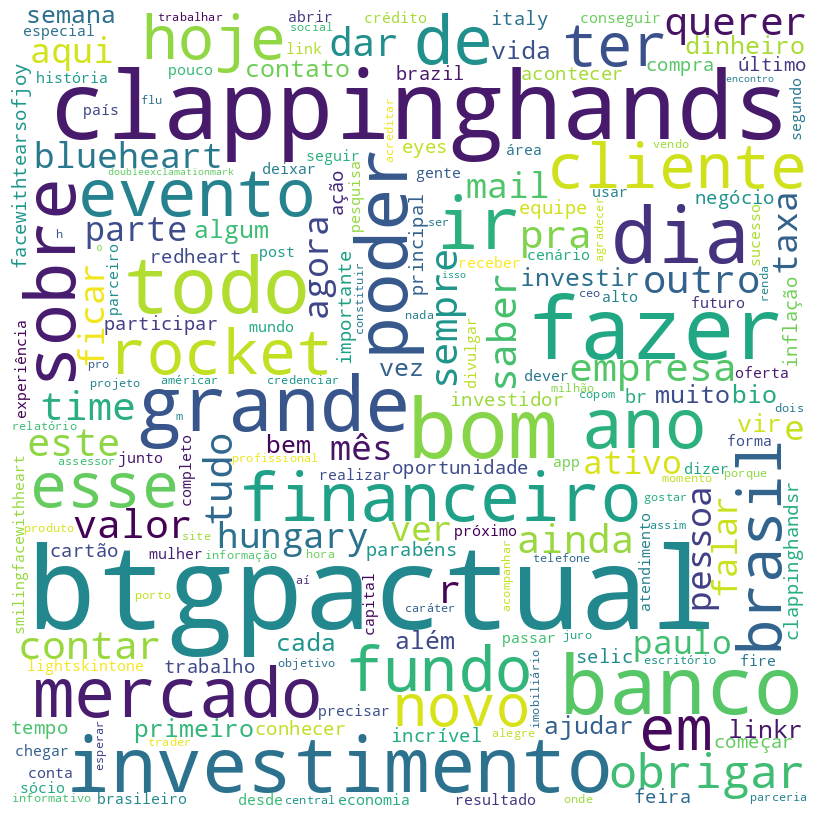

In [25]:
# Criar uma lista das palavras e suas frequências a partir do DataFrame de saída
palavras = output['Palavra'].tolist()
frequencias = output['Frequência'].tolist()

# Criar um dicionário de palavras e frequências, aqui as palavras são as chaves e as frequências são os valores
dicionario_palavras = {palavras[i]: frequencias[i] for i in range(len(palavras))}

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dicionario_palavras)

# Plotar a nuvem de palavras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

- Agora irei plotar uma gráfico de barras como uma forma alternativa de visualização.

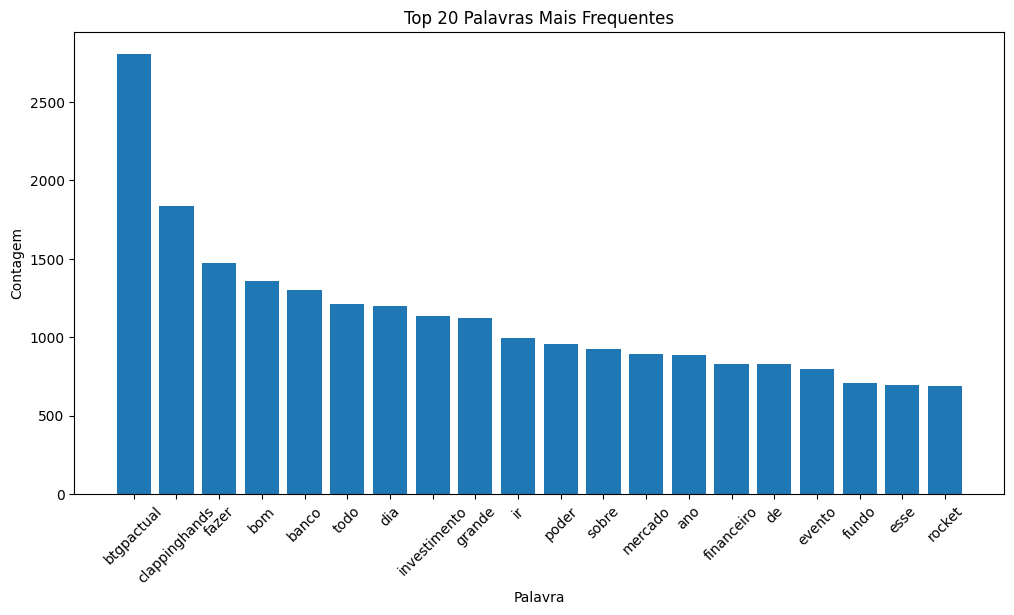

In [26]:
# Obter as palavras e suas frequências do DataFrame de saída
palavras = output['Palavra'].tolist()
frequencias = output['Frequência'].tolist()

# Plotagem do gráfico de barras, com as 20 palavras mais frequentes
plt.figure(figsize=(12, 6))
plt.bar(range(20), frequencias[:20])
plt.xticks(range(20), palavras[:20], rotation=45)  # Definir os rótulos do eixo x como os nomes das palavras
plt.xlabel('Palavra')
plt.ylabel('Contagem')
plt.title('Top 20 Palavras Mais Frequentes')
plt.show()

# 5. BoW + Naive Bayes

- Aqui irei aplicar um modelo demonstrativo utilizando o algoritmo de Naive Bayes, a partir da matriz apresentada pelo modelo Bag of Words

In [27]:
encoder = LabelEncoder() # Instanciando o encoder para transformar as classes em números inteiros, a partir da biblioteca LabelEncoder

# ajustando o codificador aos dados da coluna 'sentimento' para ser possível de se aplicar na predição
sentimento = encoder.fit_transform(df['sentimento'])

# Dividir os dados em treino e teste, a partir da biblioteca de train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(bow_model, sentimento, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes, a partir da biblioteca do NB
modelo = MultinomialNB()
modelo.fit(X_treino, y_treino)

# Fazer a predição usando os dados de teste
predicao_numerica = modelo.predict(X_teste)

# Decodificar as classes preditas
predicao = encoder.inverse_transform(predicao_numerica)

# Avaliar a acurácia do modelo
acuracia = (predicao == df['sentimento'].iloc[y_teste]).mean()
print('Acurácia:', acuracia)

Acurácia: 0.5624321389793703


- Agora, irei aplicar o método de cross-validation 7 vezes para analisar os resultados

- O método de validação cruzada (cross-validation) é uma técnica usada para avaliar o desempenho de um modelo de aprendizado de máquina. Ele ajuda a estimar o desempenho do modelo em dados não vistos, fornecendo uma medida mais robusta da sua capacidade de generalização.

In [28]:
# Avaliar o modelo usando validação cruzada
scores = cross_val_score(modelo, bow_model, sentimento, cv=7)

# Exibir a acurácia média do modelo
print('Acurácia média:', scores.mean())

Acurácia média: 0.6724311486588003


- Agora irei aplicar a técnica de GridSearch
- Grid search é uma técnica de busca de hiperparâmetros usada para encontrar a melhor combinação de valores para um modelo de aprendizado de máquina. Ele consiste em definir um conjunto de valores para cada hiperparâmetro e treinar e avaliar o modelo com todas as combinações possíveis. O conjunto de hiperparâmetros que produz a melhor métrica de avaliação é selecionado como a configuração final do modelo.


In [29]:
# Definir a grade de valores para os hiperparâmetros a serem testados
parametros = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True, False]}

# Criar uma instância do modelo MultinomialNB
modelo = MultinomialNB()

# Criar uma instância do objeto GridSearchCV
grid = GridSearchCV(modelo, parametros, cv=5, scoring='accuracy')

# Treinar o modelo com a busca exaustiva de hiperparâmetros
grid.fit(X_treino, y_treino)

# Exibir os resultados da busca exaustiva
print('Melhores hiperparâmetros:', grid.best_params_)
print('Melhor acurácia:', grid.best_score_)

# Criar um novo modelo com os melhores hiperparâmetros encontrados
modelo = MultinomialNB(alpha=grid.best_params_['alpha'], fit_prior=grid.best_params_['fit_prior'])
modelo.fit(X_treino, y_treino)

# Fazer a predição usando os dados de teste
predicao_numerica = modelo.predict(X_teste)

# Decodificar as classes preditas
predicao = encoder.inverse_transform(predicao_numerica)

# Avaliar a acurácia do modelo no conjunto de teste
acuracia = accuracy_score(df['sentimento'].iloc[y_teste], predicao)
print('Acurácia no conjunto de teste:', acuracia)

Melhores hiperparâmetros: {'alpha': 0.5, 'fit_prior': True}
Melhor acurácia: 0.693550577053632
Acurácia no conjunto de teste: 0.5537459283387622


-  Aqui nós podemos ver a revocação do Gridsearch

In [30]:
# Definir a grade de valores para os hiperparâmetros a serem testados
parametros = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True, False]}

# Criar uma instância do modelo MultinomialNB
modelo = MultinomialNB()

# Criar uma instância da métrica de avaliação recall
recall = make_scorer(recall_score, average='macro')

# Criar uma instância do objeto GridSearchCV
grid = GridSearchCV(modelo, parametros, cv=5, scoring=recall)

# Treinar o modelo com a busca exaustiva de hiperparâmetros
grid.fit(X_treino, y_treino)

# Exibir os resultados da busca exaustiva
print('Melhores hiperparâmetros:', grid.best_params_)
print('Melhorrevocação:', grid.best_score_)

Melhores hiperparâmetros: {'alpha': 0.1, 'fit_prior': True}
Melhorrevocação: 0.7103233123310607


# Random Forest + BoW

In [31]:
# Criar uma instância do modelo Random Forest
rfc = RandomForestClassifier()

# Treinar o modelo com os dados de treino
rfc.fit(X_treino, y_treino)

# Fazer previsões com o modelo treinado
y_pred = rfc.predict(X_teste)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_teste, y_pred)

# Exibir a acurácia do modelo
print('Acurácia do modelo:', acuracia)

Acurácia do modelo: 0.7041259500542888


- Aqui irei realizar a validação cruzada do modelo Random Forest e ver seu resultado

In [32]:
# Criar uma instância do modelo Random Forest
rfc = RandomForestClassifier()

# Realizar a validação cruzada de 5 folds
scores = cross_val_score(rfc, bow_model, sentimento, cv=5)

# Exibir as pontuações de validação cruzada
print('Pontuações de validação cruzada:', scores)

# Exibir a média das pontuações de validação cruzada
print('Média da validação cruzada:', scores.mean())

Pontuações de validação cruzada: [0.64332248 0.66775244 0.68984248 0.67246062 0.70124932]
Média da validação cruzada: 0.6749254671462719


- Aqui irei realizar o grid search e ver seus melhores resultados

In [33]:
# Definir a grade de valores para os hiperparâmetros a serem testados
parametros = {'n_estimators': [100, 200, 300], 
              'max_depth': [None, 10, 20], 
              'min_samples_split': [2, 5, 10]}

# Criar uma instância do modelo Random Forest
rfc = RandomForestClassifier()

# Criar uma instância do objeto GridSearchCV
grid = GridSearchCV(rfc, parametros, cv=5, n_jobs=-1)

# Realizar a busca em grade com validação cruzada
grid.fit(bow_model, sentimento)

# Exibir os resultados da busca em grade
print('Melhores hiperparâmetros:', grid.best_params_)
print('Melhor pontuação:', grid.best_score_)

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Melhor pontuação: 0.6916536178881209


# Pycaret

O PyCaret executa uma comparação automatizada de vários algoritmos de aprendizado de máquina com várias métricas de validação para selecionar o melhor modelo para um determinado problema. Ele oferece a opção de escolher o modelo com o melhor desempenho com base em métricas como precisão, recall, F1-score, AUC-ROC, entre outras. Dessa forma, o PyCaret ajuda a simplificar e agilizar o processo de seleção de modelos para cientistas de dados e analistas de negócios.


In [34]:
# Criar o modelo de Bag-of-Words
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(df['texto_tratado'])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(bow_model, df['sentimento'], test_size=0.2, random_state=42)

# Criar e treinar o modelo de classificação de sentimentos
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Fazer a previsão usando os dados de teste
predictions = classifier.predict(X_test)

#Configurar o ambiente PyCaret e treinar o modelo usando validação cruzada
classif = setup(data = df, target = 'sentimento', verbose=False)
best_model = compare_models()

# Fazer a previsão usando os dados de teste
predictions = predict_model(best_model, data=X_test)

# Avaliar o desempenho do modelo
evaluate_model(best_model)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparin

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.4975,0.5574,0.4975,0.7058,0.3952,0.1261,0.2286,0.5460
et,Extra Trees Classifier,0.4961,0.6943,0.4961,0.6973,0.3901,0.1197,0.2242,0.8630
gbc,Gradient Boosting Classifier,0.4952,0.5370,0.4952,0.7229,0.3862,0.1184,0.2280,2.0130
xgboost,Extreme Gradient Boosting,0.4947,0.5454,0.4947,0.7237,0.3854,0.1175,0.2275,1.1570
lightgbm,Light Gradient Boosting Machine,0.4944,0.5684,0.4944,0.7190,0.3838,0.1159,0.2275,1.1050
rf,Random Forest Classifier,0.4930,0.6059,0.4930,0.7225,0.3813,0.1125,0.2274,1.1470
knn,K Neighbors Classifier,0.4919,0.5531,0.4919,0.7313,0.3785,0.1099,0.2281,0.5320
ridge,Ridge Classifier,0.4871,0.0000,0.4871,0.5163,0.4058,0.1200,0.1634,0.4270
svm,SVM - Linear Kernel,0.4843,0.0000,0.4843,0.6676,0.3737,0.0988,0.1975,0.3840
lr,Logistic Regression,0.4732,0.6684,0.4732,0.5722,0.3746,0.0858,0.1495,1.2390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

AttributeError: ignored